<a href="https://colab.research.google.com/github/Jaseelkt007/Signal_processing/blob/main/Frequency_analysis_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Short fourier transform - STFT

* Fourier Transform only gives the frequency content or info in that signal , and it doesn't tell where that frequency is .
* FT can only applied to Stationary signals like Period signals where its distribution property remains same all the time in that time frame
* For Non Stationary signal like speech, we have to cut it to short segments to make it stochastic in that time. then take FT on that specific window.

* STFT cuts the signal into overlapping windows (segments), then applies FFT to each window.
  1. Chop the signals in to overlapping segments(window) , for eg: 256 samples,
    *  You use window function like Hamming, Hann to reduce the spectral leakage or edge effect
  2. FFT on each window seperatly
  3. Slide the window a bit (eg: 128 samples) and repeat
  4.  Stack the results , get a matrix:
    * Rows = Frequency bins
    * Columns = time windows
    * Values = magnitude or power of frequency at that time

  * Frequency Bins = a specific frequency range captured in the STFT result
    * Sampling fs = 1000
    * Window size N = 256
    * Then
       *  FFT gives



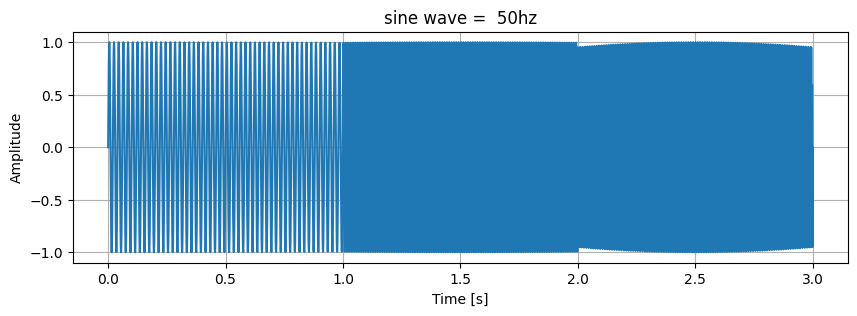

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

fs = 1000 # Sampling frequency
T = 3 # duration in seconds
t = np.linspace(0 , T , int(fs * T), endpoint= True)

f1 = 50 # Frequency of sine wave
f2 = 100
f3 = 300

t1 = t[0:fs]
t2 = t[fs: 2*fs]
t3 = t[2*fs:]


seg1 = np.sin(2 * np.pi * f1 * t1)
seg2 = np.sin(2 * np.pi * f2 * t2)
seg3 = np.sin(2 * np.pi * f3 * t3)

# Concatenate
signal = np.concatenate([seg1, seg2, seg3])
# Same 50 , 100 , 150 hz every where

plt.figure(figsize = (10,3))
plt.plot(t,signal)
plt.title("sine wave =  50hz")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


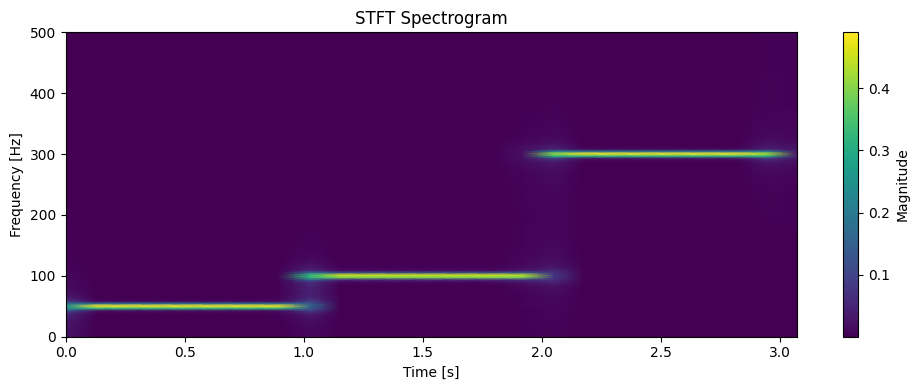

In [14]:
f_stft , t_stft , Zxx = stft(signal, fs=fs, nperseg=256)


plt.figure(figsize=(10, 4))
plt.pcolormesh(t_stft, f_stft, np.abs(Zxx), shading="gouraud")
plt.title("STFT Spectrogram")
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [s]")
plt.colorbar(label='Magnitude')


# Ovelay bin
num_bins = len(f_stft)
step = max(1, num_bins // 20)


for idx in range(0, num_bins, step):
    freq = f_stft[idx]
    plt.text(t_stft[-1] + 0.05, freq, f"Bin {idx}", fontsize=8, color='white')

plt.tight_layout()
plt.show()


In [23]:
!pip install pydub
!apt install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [38]:
from google.colab import files
uploaded = files.upload()

Saving Recording (2).m4a to Recording (2).m4a


In [41]:
from pydub import AudioSegment

input_file = "Recording (2).m4a"
output_file = "converted.wav"

# Load and convert to mono WAV
audio = AudioSegment.from_file(input_file, format="m4a")
audio = audio.set_channels(1)          # convert to mono
audio = audio.set_frame_rate(44100)    # optional: resample
audio.export(output_file, format="wav")


<_io.BufferedRandom name='converted.wav'>

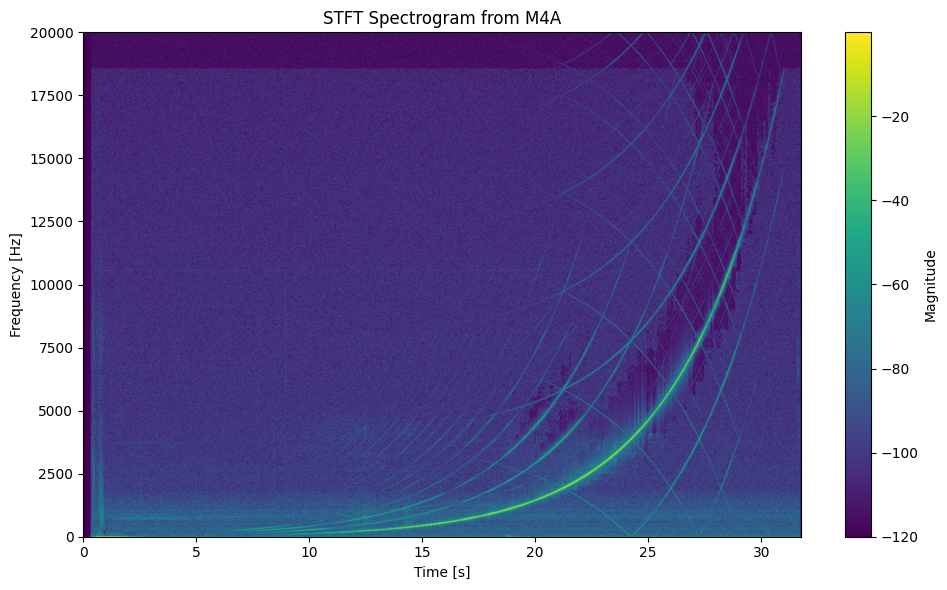

Shape of signal: (1398969,)


In [45]:
from scipy.io import wavfile
from scipy.signal import stft
import matplotlib.pyplot as plt
import numpy as np

# Read the converted file
fs, signal = wavfile.read("converted.wav")

# Ensure it's a 1D float32 array
if signal.ndim > 1:
    signal = signal[:, 0]  # take one channel if stereo

signal = signal.astype(np.float32)
signal = signal / np.max(np.abs(signal))  # Normalize to [-1, 1]

# Compute STFT
f_stft, t_stft, Zxx = stft(signal, fs=fs, nperseg=2048)
magnitude_db = 20 * np.log10(np.abs(Zxx) + 1e-6)
# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft, f_stft, magnitude_db, shading='gouraud')
plt.title("STFT Spectrogram from M4A")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.ylim(0, 20000)
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()
print("Shape of signal:", signal.shape)



20 * log10(magnitude) ?
* Human hearing perceives loudness logarithmically, not linearly.
* Taking the log helps compress large differences , easy for ploting
  * log10(1000) = 3
  * log10(10)   = 1
  * log10(0.1)  = -1
